#4. Проверка статистических гипотез


Аккуратова Дарья Александровна 337100

студент, 1-й курс, группа S41032, факультет ВШ ЦК 

Задание:

Две задачи на сравнение
центров распределений.

Ожидается, что Вы правильно поставите задачу и проверите
статистическую гипотезу правильно выбранным критерием. Кроме того, решение должны быть проиллюстрировано ящиковой диаграммой.

Те, чья фамилия начинается на буквы А-К решают первый вариант.
Те, чья фамилия начинается на буквы Л-Я решают второй вариант.

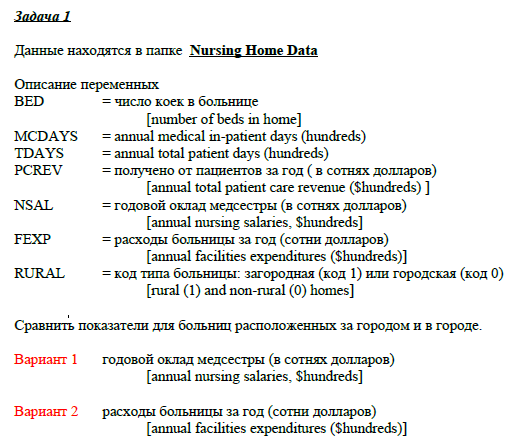

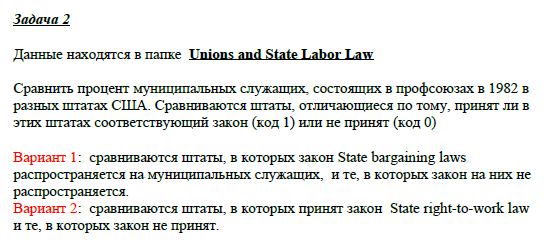

Ответ: 

В задачах 1 и 2 были произведены проверки таких статистических гипотез как 
гипотеза о нормальности распределения данных, где был применен критерий Шапиро-Уилка, гипотеза о равенстве средних значений, где был применен критерий Стьюдента для независимых выборок, а также в качестве прагматичного подхода выполнили проверку гипотезы о равенстве медиан в обоих заданиях, где для независимых выборок был применен критерий Манна-Уитни.

В обеих задачах центром распределения, то есть тем одинственным числом, которое описывало бы выборку, было выбрано среднее значение.

В задаче 1 показатели годового оклада медсестры (в сотнях долларов) для больниц, расположенных за городом и в городе, различаются значимо. Для городских больниц годовой оклад значительно больше, чем для загородных, средние значения достаточно отличаются друг от друга.

В задаче 2 для штатов, где закон State bargaining laws распространяется на муниципальных служащих, процент муниципальных служащих, состоящих в профсоюзах в 1982 в разных штатах США, значительно больше, чем в тех штатах, где данный закон на них не распространяется, средние значения также отличаются друг от друга.

В каждой задаче решение проиллюстрировано ящиковыми диаграммами и графиками гистограмм.


ЗАДАЧА 1

In [44]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('Nursing Home Data_data', delimiter=' ')

In [46]:
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL,Unnamed: 7
0,244,128,385,23521,5230,5334,0,NaN
1,59,155,203,9160,2459,493,1,NaN
2,120,281,392,21900,6304,6115,0,NaN
3,120,291,419,22354,6590,6346,0,NaN
4,120,238,363,17421,5362,6225,0,NaN


In [47]:
df.shape

(52, 8)

In [48]:
df.columns

Index(['BED', 'MCDAYS', 'TDAYS', 'PCREV', 'NSAL', 'FEXP', 'RURAL',
       'Unnamed: 7'],
      dtype='object')

In [49]:
df = df.drop('Unnamed: 7',axis=1)
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


Сравним показатели годового оклада медсестры (в сотнях долларов) для больниц, расположенных за городом и в городе. Предварительно следует:

1. Проверить гипотезу о нормальности распределения;
2. Проверить равенство (дисперсий, средних значений, медиан).

Стоит отметить, что обе выборки будут независимыми.

(array([ 2., 14.,  6.,  5.,  7.,  5.,  4.,  4.,  3.,  2.]),
 array([1288. , 1908.1, 2528.2, 3148.3, 3768.4, 4388.5, 5008.6, 5628.7,
        6248.8, 6868.9, 7489. ]),
 <a list of 10 Patch objects>)

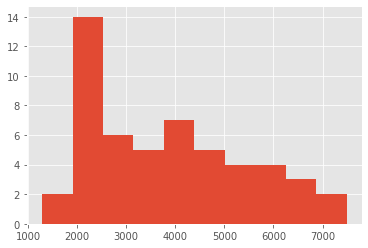

In [50]:
# Гистограмма показателей годового оклада медсестры для всех больниц вместе, 
# расположенных за городом и в городе (NSAL)

plt.hist(df['NSAL'])

In [51]:
# Параметры распределения: математическое ожидание и стандартное отклонение

# Для NSAL
mu_NSAL = np.mean(df['NSAL'])
sigma_NSAL = np.std(df['NSAL'])

print(f'Математическое ожидание:{mu_NSAL}, Стандартное отклонение: {sigma_NSAL}')

Математическое ожидание:3812.826923076923, Стандартное отклонение: 1643.4470659275635


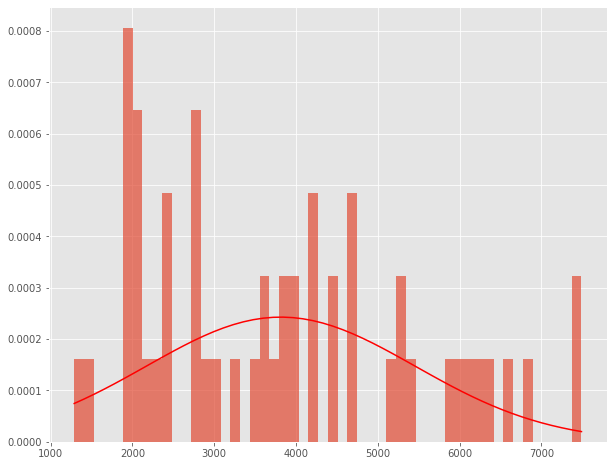

In [52]:
# Гистограмма и график плотности нормального распределения для NSAL

# Решетка точек для построения графика функции
NSAL_point = np.linspace(np.min(df['NSAL']), np.max(df['NSAL']), 52)

plt.figure(figsize=(10,8))
pd.Series(df['NSAL']).hist(alpha=0.7, bins=52, density=1)
plt.plot(NSAL_point, stats.norm.pdf(NSAL_point, mu_NSAL, sigma_NSAL), color='red')


Для определения нормальности распределения годового оклада медсестры будем использовать критерий Шапиро-Уилка. 

Этот критерий проверяет гипотезу о нормальности распределения данных:

Н0: ряд имеет нормальное распределение;

H1: ряд не нормально распределен.

In [53]:
# Проверка гипотезы о нормальности распределения. Критерий Шапиро-Уилка

# Для NSAL
res = stats.shapiro(df['NSAL'])
print('p-value:', res[1])

p-value: 0.01333833672106266


p-value < alfa (0.013 < 0.05) , следовательно, гипотеза о нормальности отвергается, а это значит, что распределение не является нормальным. 

Хотя стоит отметить, что ситуация является пограничной. При уровне значимости 0.05 гипотеза будет отвергнута, а при уровне равном 0.01 уже нет.

In [54]:
# Сохраним данные об окладе медсестры для загородных и городских больницах в отдельные переменные,
# их и будем сравнивать

# Годовой оклад медсестры для загородных больниц
x = df[df['RURAL'] == 1]['NSAL'].reset_index(drop=True)

# Годовой оклад медсестры для городских больниц
y = df[df['RURAL'] == 0]['NSAL'].reset_index(drop=True)

x.name, y.name = 'rural', 'non-rural'

In [55]:
# Для загородных больниц, код 1

x.head()

0    2459
1    3622
2    4406
3    4173
4    3224
Name: rural, dtype: int64

In [56]:
x.shape

(34,)

In [57]:
# Для городских больниц, код 0

y.head()

0    5230
1    6304
2    6590
3    5362
4    1955
Name: non-rural, dtype: int64

In [58]:
y.shape

(18,)

In [59]:
# Проверка гипотезы о нормальности распределения. Критерий Шапиро-Уилка

# Для загородных больниц
res_x = stats.shapiro(x)
print('Для переменной x p-value:', res_x[1])

# Для городских больниц
res_y = stats.shapiro(y)
print('Для переменной y p-value:', res_y[1])

Для переменной x p-value: 0.0717819407582283
Для переменной y p-value: 0.2665903866291046


Заметим, что гипотеза о нормальности не отвергается как для переменной x, так и для переменной y. То есть распределение вполне нормальное, это связано с небольшим размером выборки.

Продолжим анализ: построим и рассмотрим гистограммы, выясним, существенны ли отличия распределений сравниваемых совокупностей от нормального.

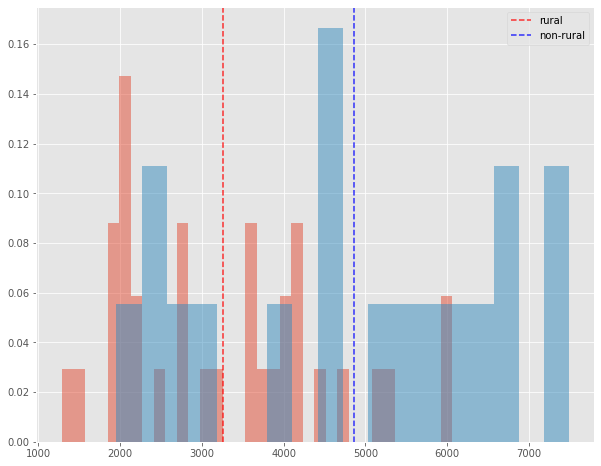

In [60]:
# Проверяем нормальность распределений. Построим 2 отдельные гистограммы для загородных и городских больниц

def two_histograms(x, y):

  plt.figure(figsize=(10,8))
  x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins=34)
  y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins=18)
  plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
  plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
  plt.legend([x.name, y.name])

two_histograms(x, y)

In [61]:
# Параметры распределения: математическое ожидание и стандартное отклонение

# Для загородных больниц
mu_x = np.mean(x)
sigma_x = np.std(x)

# Для городских больниц
mu_y = np.mean(y)
sigma_y = np.std(y)

# Решетки точек для построения графика функции
x_1 = np.linspace(np.min(x), np.max(x), 50)
y_1 = np.linspace(np.min(y), np.max(y), 50)

print(f'Математическое ожидание для x:{mu_x}, Стандартное отклонение для x: {sigma_x}')
print(f'Математическое ожидание для y:{mu_y}, Стандартное отклонение для y: {sigma_y}')

Математическое ожидание для x:3258.705882352941, Стандартное отклонение для x: 1259.2774195454958
Математическое ожидание для y:4859.5, Стандартное отклонение для y: 1769.6844743877054


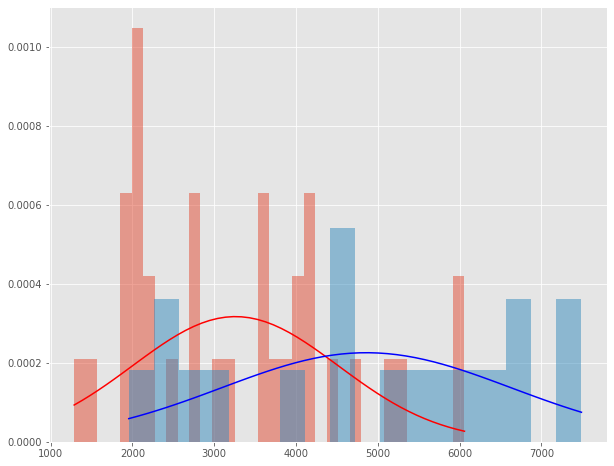

In [62]:
# Построим 2 отдельные гистограммы для загородных и городских больниц. 
# Добавим графики плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(x).hist(alpha=0.5, bins=34, density=1)
pd.Series(y).hist(alpha=0.5, bins=18, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu_x, sigma_x), color='red')
plt.plot(y_1, stats.norm.pdf(y_1, mu_y, sigma_y), color='blue')

Заметим, что в двух гистограммах присутствуют существенные отклонения от нормальности, выбросы, ассиметрия, отсутствует явная колокообразность. Однако критерий Шапиро-Уилка говорит нам обратное. Опять же стоит отметить, что данная выборка достаточно мала, поэтому доверимся данному критерию и также будем утверждать, что оба ряда имеют нормальное распредление.

Так как распределение каждой выборки будем считать нормальным или несущественно отличающимся от нормального, в качестве центра распределения будем использовать среднее арифметическое, а именно одну из версий критерия согласия Стьюдента. Но перед этим проверим равенство дисперсий.

Для определения равенства дисперсий воспользуемся критерием Флигнера-Килина:

Н0: дисперсии равны;

H1: дисперсии не равны.

In [63]:
# Проверка гипотезы о равенстве дисперсий. Критерий Флигнера-Килина

res = stats.fligner(x,y)
print('p-value:', res[1])

p-value: 0.05254860862708049


Значение p-value больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем.

Проверим гипотезы о равенстве средних значений:

Н0: средние значения равны;

H1: средние значения не равны.

В двух выборках находятся разные объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ttest_ind с опцией equal_var=True, что отмечает равенство дисперсий.

In [64]:
# Проверка гипотезы о равенстве средних значений

res = stats.ttest_ind(x, y, equal_var=True)
print('p-value:', res[1])

p-value: 0.0005409523097389856


Значение p-value меньше уровня значимости 0.05, поэтому основную гипотезу отвергаем, это показывает различие математических ожиданий.

.

*Дополнительное вычисление. Попробуем другой вариант.

Примем во внимание то, что в распределении есть очевидные выбросы, которые не дают применить критерий Стьюдента. На гистограммвх видно, что удаление выбросов не сделает данные более нормальными.

Тогда можно применить непараметрический критерий. Критерий Уилкоксона применим только для парных выборок, а тк у нас независимые выборки из-за того, что в разных выборках находятся значения для разного расположения больниц, за городом и в городе, поэтому применим критерий Манна-Уитни.

Поэтому попробуем применить более прагматичный подход, который заключается в применении двух тестов: критерия согласия Стьюдента и критерия Манна-Уитни.

Для проверки гипотезы о равенстве медиан воспользуемся критерием Манна-Уитни:

Н0: медианы равны;

H1: медианы не равны.

In [65]:
# Прагматичный подход.
# Проверка гипотезы о равенстве медиан. Критерий Манна-Уитни

res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.0008872799867406389


Значение p-value намного меньше уровня значимости 0.05, поэтому основную гипотезу о равенстве медиан отвергаем.

Выводы совпадают, ответ есть.

.

Для более наглядного представления результатов анализа приведем ящиковую диаграмму, построенную по сравниваемым выборкам.

Text(0.5, 1.0, 'Ящиковая диаграмма оклада медсестры для загородных и городских больниц')

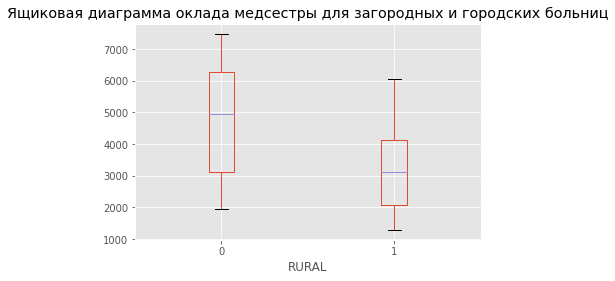

In [66]:
# Иллюстрируем решение ящиковой диаграммой.
# Для загородных больниц - код 1, для городских больниц - код 0

b_p = df.boxplot(column="NSAL", by="RURAL")
b_p.get_figure().suptitle('')

plt.title(u'Ящиковая диаграмма оклада медсестры для загородных и городских больниц')

Вывод: 

Показатели годового оклада медсестры (в сотнях долларов) для больниц, расположенных за городом и в городе, различаются значимо. Для городских больниц годовой оклад значительно больше, чем для загородных.

Важно заметить, что средние значения значительно отличаются друг от друга.

ЗАДАЧА 2

In [67]:
df_two = pd.read_csv('Unions and State Labor Law_data', delimiter=' ')

In [68]:
df_two.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [69]:
df_two.shape

(50, 5)

Имена переменных:

DENS: Процент работников государственного сектора в профсоюзах, 1982 г.

COMP: Закон штата State bargaining laws распространяются на государственных служащих (1) или нет (0)

RTW: Закон штата State right-to-work law о праве на труд (1) или нет (0)

PVT: Процент работников частного сектора в профсоюзах, 1982 г.

Сравним процент муниципальных служащих, состоящих в профсоюзах в 1982 в разных штатах США. Сравниваются штаты, отличающиеся по тому, принят ли в этих штатах соотсветствующий закон (код 1) или не принят (код 0). В данном варианте сравниваются штаты, в которых закон State bargaining laws распространяется на муниципальных служащих, и те, в которых закон на них не распространяется. 

Предварительно следует:

1. Проверить гипотезу о нормальности распределения;
2. Проверить равенство (дисперсий, средних значений, медиан).

Стоит отметить, что обе выборки будут независимыми.

(array([ 3.,  7.,  7., 12.,  5.,  4.,  4.,  3.,  3.,  2.]),
 array([13.4 , 18.17, 22.94, 27.71, 32.48, 37.25, 42.02, 46.79, 51.56,
        56.33, 61.1 ]),
 <a list of 10 Patch objects>)

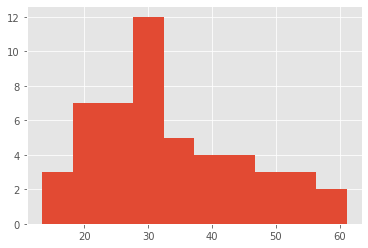

In [70]:
# Гистограмма показателей процента работников гос. сектора в профсоюзах, где закон State bargaining laws 
# распространяется и не распространяется на муниципальных служащих (DENS)

plt.hist(df_two['DENS'])

In [71]:
# Параметры распределения: математическое ожидание и стандартное отклонение

# Для DENS
mu_DENS = np.mean(df_two['DENS'])
sigma_DENS = np.std(df_two['DENS'])

print(f'Математическое ожидание:{mu_DENS}, Стандартное отклонение: {sigma_DENS}')

Математическое ожидание:33.31999999999999, Стандартное отклонение: 11.390697959299949


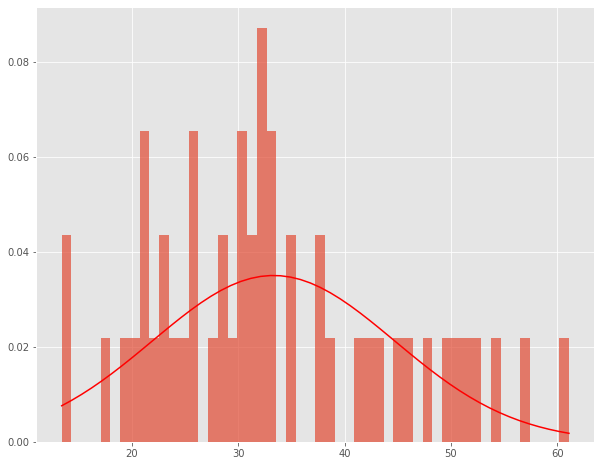

In [72]:
# Гистограмма и график плотности нормального распределения для DENS

# Решетка точек для построения графика функции
DENS_point = np.linspace(np.min(df_two['DENS']), np.max(df_two['DENS']), 52)

plt.figure(figsize=(10,8))
pd.Series(df_two['DENS']).hist(alpha=0.7, bins=52, density=1)
plt.plot(DENS_point, stats.norm.pdf(DENS_point, mu_DENS, sigma_DENS), color='red')


Для определения нормальности распределения годового оклада медсестры будем использовать критерий Шапиро-Уилка. 

Этот критерий проверяет гипотезу о нормальности распределения данных:

Н0: ряд имеет нормальное распределение;

H1: ряд не нормально распределен.

In [73]:
# Проверка гипотезы о нормальности распределения. Критерий Шапиро-Уилка

# Для DENS
res = stats.shapiro(df_two['DENS'])
print('p-value:', res[1])

p-value: 0.08963875472545624


p-value < alfa (0.0896 > 0.05) , следовательно, гипотеза о нормальности не отвергается, а это значит, что распределение  является нормальным.

In [74]:
# Сохраним данные процентов работников государственного сектора в профсоюзах, 
# где закон State bargaining laws распространяется и не распространяется
# на муниципальных служащих в отдельные переменные, их и будем сравнивать

# Штаты, где закон State bargaining laws распространяется на муниципальных служащих
x_two = df_two[df_two['COMP'] == 1]['DENS'].reset_index(drop=True) 

# Штаты, где закон State bargaining laws не распространяется на муниципальных служащих
y_two = df_two[df_two['COMP'] == 0]['DENS'].reset_index(drop=True) 

x_two.name, y_two.name = 'cover', 'not cover'

In [75]:
# Для штатов, где закон распространяется на муниципальных служащих, код 1

x_two

0     56.9
1     49.6
2     32.4
3     54.6
4     30.7
5     35.1
6     38.4
7     46.2
8     32.9
9     43.5
10    44.8
11    25.0
12    35.0
13    50.6
14    31.6
15    52.5
16    61.1
17    51.6
18    47.7
19    20.8
20    29.0
21    41.4
22    22.9
23    37.3
24    23.1
25    21.4
26    13.7
Name: cover, dtype: float64

In [76]:
# Для штатов, где закон не распространяется на муниципальных служащих, код 0

y_two

0     30.2
1     30.6
2     26.1
3     28.6
4     38.0
5     32.8
6     32.4
7     32.4
8     32.1
9     33.0
10    42.3
11    26.1
12    31.4
13    22.5
14    21.6
15    25.7
16    17.4
17    24.0
18    19.6
19    27.3
20    20.1
21    13.4
22    28.6
Name: not cover, dtype: float64

In [77]:
# Проверка гипотезы о нормальности распределения. Критерий Шапиро-Уилка

# Штаты, где закон распространяется на муниципальных служащих
res_x_two = stats.shapiro(x_two)
print('Для переменной x p-value:', res_x_two[1])

# Штаты, где закон не распространяется на муниципальных служащих
res_y_two = stats.shapiro(y_two)
print('Для переменной y p-value:', res_y_two[1])

Для переменной x p-value: 0.7401027679443359
Для переменной y p-value: 0.943257212638855


Заметим, что гипотеза о нормальности не отвергается как для переменной x, так и для переменной y. То есть распределение вполне нормальное, это связано с небольшим размером выборки.

Продолжим анализ: построим и рассмотрим гистограммы, выясним, существенны ли отличия распределений сравниваемых совокупностей от нормального.

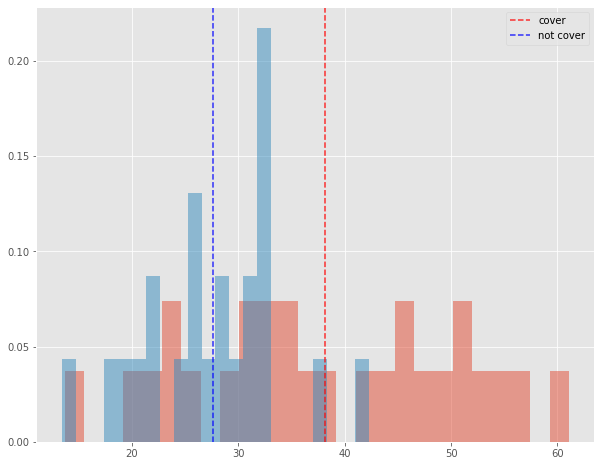

In [78]:
# Проверяем нормальность распределений. Построим 2 отдельные гистограммы для штатов, 
# где закон распространяется и не распространяется на муниципальных служащих

def two_histograms(x_two, y_two):
  
  plt.figure(figsize=(10,8))
  x_two.hist(alpha=0.5, weights=[1./len(x_two)]*len(x_two), bins=26)
  y_two.hist(alpha=0.5, weights=[1./len(y_two)]*len(y_two), bins=22)
  plt.axvline(x_two.mean(), color='red', alpha=0.8, linestyle='dashed')
  plt.axvline(y_two.mean(), color='blue', alpha=0.8, linestyle='dashed')
  plt.legend([x_two.name, y_two.name])

two_histograms(x_two, y_two)

In [79]:
# Параметры распределения: математическое ожидание и стандартное отклонение

# Штаты, где закон распространяется на муниципальных служащих
mu_x_two = np.mean(x_two)
sigma_x_two = np.std(x_two)

# Штаты, где закон не распространяется на муниципальных служащих
mu_y_two = np.mean(y_two)
sigma_y_two = np.std(y_two)

# Решетка точек для построения графика функции
x_1_two = np.linspace(np.min(x_two), np.max(x_two), 50)
y_1_two = np.linspace(np.min(y_two), np.max(y_two), 50)

print(f'Математическое ожидание для x:{mu_x_two}, Стандартное отклонение для x: {sigma_x_two}')
print(f'Математическое ожидание для y:{mu_y_two}, Стандартное отклонение для y: {sigma_y_two}')

Математическое ожидание для x:38.14074074074074, Стандартное отклонение для x: 12.375820489350856
Математическое ожидание для y:27.660869565217393, Стандартное отклонение для y: 6.554105194153527


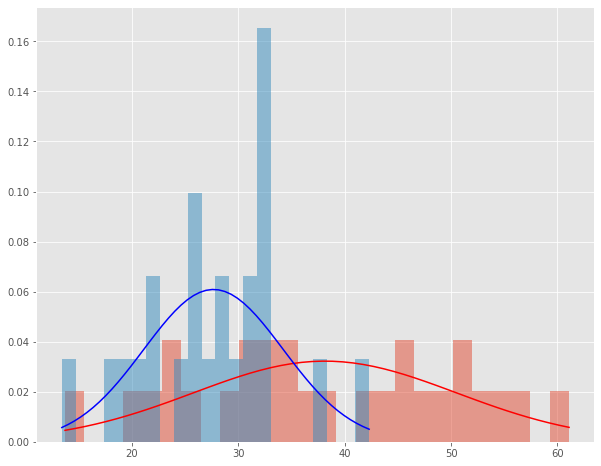

In [80]:
# Построим 2 отдельные гистограммы для штатов, где закон распространяется и 
# не распространяется на муниципальных служащих.
# Добавим графики плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(x_two).hist(alpha=0.5, bins=26, density=1)
pd.Series(y_two).hist(alpha=0.5, bins=22, density=1)
plt.plot(x_1_two, stats.norm.pdf(x_1_two, mu_x_two, sigma_x_two), color='red')
plt.plot(y_1_two, stats.norm.pdf(y_1_two, mu_y_two, sigma_y_two), color='blue')

Заметим, что в двух гистограммах присутствуют существенные отклонения от нормальности, выбросы, ассиметрия, отсутствует явная колокообразность. Однако критерий Шапиро-Уилка говорит нам обратное. Опять же стоит отметить, что данная выборка достаточно мала, поэтому доверимся данному критерию и также будем утверждать, что оба ряда имеют нормальное распредление.

Так как распределение каждой выборки будем считать нормальным или несущественно отличающимся от нормального, в качестве центра распределения будем использовать среднее арифметическое, а именно одну из версий критерия согласия Стьюдента. Но перед этим проверим равенство дисперсий.

Для определения равенства дисперсий воспользуемся критерием Флигнера-Килина:

Н0: дисперсии равны;

H1: дисперсии не равны.

In [81]:
# Проверка гипотезы о равенстве дисперсий. Критерий Флигнера-Килина

res = stats.fligner(x_two,y_two)
print('p-value:', res[1])

p-value: 0.0022863939638667475


Значение p-value меньше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий отвергаем.

Проверим гипотезы о равенстве средних значений:

Н0: средние значения равны;

H1: средние значения не равны.

В двух выборках находятся разные объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ttest_ind.

In [82]:
# Проверка гипотезы о равенстве средних значений

res = stats.ttest_ind(x_two, y_two)
print('p-value:', res[1])

p-value: 0.0008111406933692372


Значение p-value меньше уровня значимости 0.05, поэтому основную гипотезу отвергаем, это показывает различие математических ожиданий.

.

*Дополнительное вычисление. Попробуем другой вариант.

Примем во внимание то, что в распределении есть очевидные выбросы, которые не дают применить критерий Стьюдента. На гистограммах видно, что удаление выбросов не сделает данные более нормальными.

Тогда можно применить непараметрический критерий. Критерий Уилкоксона применим только для парных выборок, а тк у нас независимые выборки, поэтому применим критерий Манна-Уитни.

Поэтому попробуем применить более прагматичный подход, который заключается в применении двух тестов: критерия согласия Стьюдента и критерия Манна-Уитни.

Для проверки гипотезы о равенстве медиан воспользуемся критерием Манна-Уитни:

Н0: медианы равны;

H1: медианы не равны.

In [83]:
# Прагматичный подход.
# Проверка гипотезы о равенстве медиан. Критерий Манна-Уитни

res = stats.mannwhitneyu(x_two, y_two)
print('p-value:', res[1])

p-value: 0.0009826755168974733


Значение p-value намного меньше уровня значимости 0.05, поэтому основную гипотезу о равенстве медиан отвергаем.

Выводы совпадают, ответ есть.

.

Для более наглядного представления результатов анализа приведем ящиковую диаграмму, построенную по сравниваемым выборкам.

Text(0.5, 1.0, 'Ящиковая диаграмма')

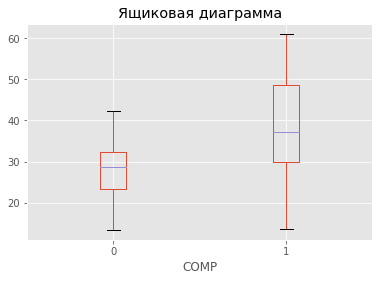

In [84]:
# Иллюстрируем решение ящиковой диаграммой.
# Для штатов, где закон State bargaining laws распространяется на муниципальных служащих, код 1
# Для штатов, где закон не распространяется на муниципальных служащих, код 0

b_p = df_two.boxplot(column="DENS", by="COMP")
b_p.get_figure().suptitle('')

plt.title(u'Ящиковая диаграмма')

Вывод: 

Для штатов, где закон State bargaining laws распространяется на муниципальных служащих, процент муниципальных служащих, состоящих в профсоюзах в 1982 в разных штатах США, значительно больше, чем в тех штатах, где данный закон на них не распространяется.

Важно заметить, что средние значения достаточно отличаются друг от друга.